# Visualising a Hashtag-Network of TikTok

In [15]:
!pip install pyvis numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.0 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for ipython>=5.3.0 from https://files.pythonhosted.org/packages/52/d1/f70cdafba20030cbc1412d7a7d6a89c5035071835cc50e47fc5ed8da553c/ipython-8.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonpickle>=1.4.1 from https://files.pythonhosted.org/packages/d3/25/6e0a450430b7aa194b0f515f64820fc619314faa289458b7dfca4a026114/jsonpickle-3.0.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.7 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for jedi>=0.16 from https://files.pythonhosted.org/packages/8e/46/7e3ae3aa2dcfcffc5138c6cef5448523218658411c84a2000bf75c8d3ec1/jedi-0.19.0-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 7.2 MB/s eta 0:00:00
  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/ec/6b/63cc3df749

First we are going to import the json database

In [16]:
# Importing the data
import json
from itertools import combinations
import numpy as np


with open('tiktok-fyp-videos.json') as file:
    database = json.load(file)
print(len(database.keys()), "videos in database")

200 videos in database


# Data Structure

Next, we use `pprint` to have a look at the data structure of our database.

In [17]:
import pprint
pprint.pprint(next(iter(database.values())))

{'id': '7246766598709726469',
 'stats': {'collectCount': '7735',
           'commentCount': 141,
           'diggCount': 94300,
           'playCount': 54800000,
           'shareCount': 11500},
 'textExtra': [{'awemeId': '',
                'end': 126,
                'hashtagId': '4855909',
                'hashtagName': 'здоровье',
                'isCommerce': False,
                'secUid': '',
                'start': 117,
                'subType': 0,
                'type': 1,
                'userId': '',
                'userUniqueId': ''},
               {'awemeId': '',
                'end': 146,
                'hashtagId': '1703921397292034',
                'hashtagName': 'долголетиездоровье',
                'isCommerce': False,
                'secUid': '',
                'start': 127,
                'subType': 0,
                'type': 1,
                'userId': '',
                'userUniqueId': ''},
               {'awemeId': '',
                'end': 158,
 

We have set the scraper to only store the video id, the statistics of the video an the hashtags, which are listed in the `textExtra` field.

# View statistics

To get an overview of the data we can use `numpy` and `matplotlib` to compute basic statistics and plot the results.

In [4]:
video_views = []

for video in database.values():
    video_views.append(video["stats"]["playCount"])

# Calculate basic statistics
average = np.mean(video_views)
median = np.median(video_views)
print("Average views:", average)
print("Median views:", median)

Average views: 14644389.5
Median views: 6850000.0


You'll see that the average and median of views are rather high, depending on how long you let your scraper run. The TikTok Website mostly shows videos that are highly engaging and have already received a high number of views on the past. 
When you notice a big difference between the average and the median this normally means that there are a few outliers that have received many times more views than the rest of the videos. We can also see this in the plot below.

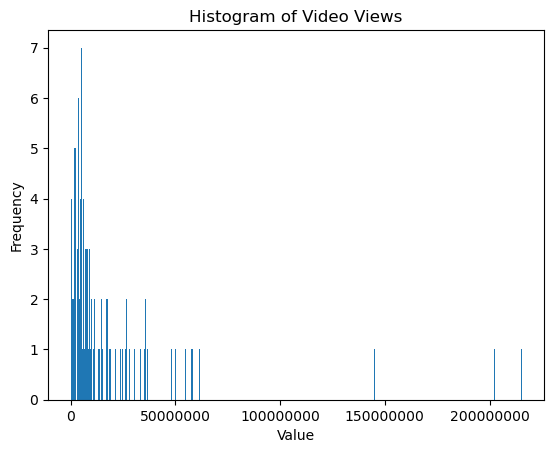

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.hist(video_views, bins=1000)

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Video Views')
#plt.xlim(left= 0, right=10000000)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.0f'))

# Display the histogram
plt.show()

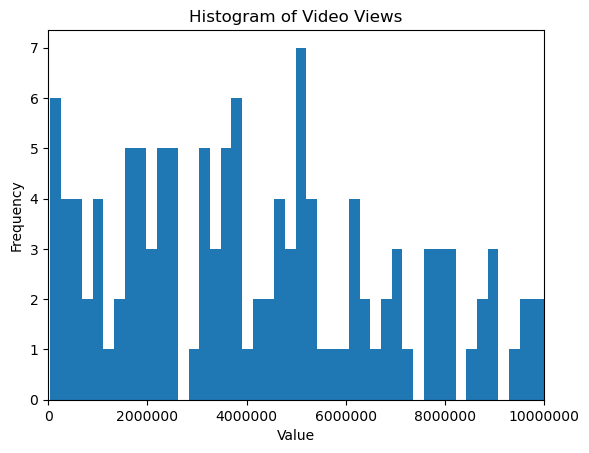

In [7]:
plt.hist(video_views, bins=1000)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Video Views')
# Limit the histogram to ignore outliers
plt.xlim(left= 0, right=10000000)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.0f'))
plt.show()

# Hashtags

In [8]:
videos_wo_hashtags = 0
hashtag_occurences = {}

for video in database.values():
    video_views.append(video["stats"]["playCount"])
    if "textExtra" in video:
        for hashtag in video["textExtra"]:
            if hashtag["hashtagName"] not in hashtag_occurences:
                hashtag_occurences[hashtag["hashtagName"]] = 1
            else:
                hashtag_occurences[hashtag["hashtagName"]] += 1
    else:
        videos_wo_hashtags += 1
                
hashtags_sorted = dict(sorted(hashtag_occurences.items(), key=lambda item: item[1], reverse=True))
print("There are", videos_wo_hashtags, "videos without hashtags (", videos_wo_hashtags*100/len(database.keys()), "%)")
print("The ten most common hashtags:")
print(list(hashtags_sorted)[:20])



There are 44 videos without hashtags ( 22.0 %)
The ten most common hashtags:
['fyp', '', 'viral', 'foryou', 'foryoupage', 'fypシ', 'capcut', 'trending', 'xyzbca', 'funny', 'fy', 'fypシ゚viral', 'tiktok', 'اكسبلور', 'meme', 'здоровье', 'nekoglai', 'fypage', 'تركيا', 'fyppppppppppppppppppppppp']


In [10]:
hashtag_nodes = {}
hashtag_edges = []
for vid in database:
    listofhashtags = []
    if "textExtra" in database[vid]:
        for hashtag in database[vid]["textExtra"]:
            listofhashtags.append(hashtag["hashtagName"])
            if hashtag["hashtagName"] not in hashtag_nodes:
                hashtag_nodes[hashtag["hashtagName"]]=len(hashtag_nodes.keys())+1
        for combination in combinations(listofhashtags, 2):
            hashtag_edges.append([hashtag_nodes[combination[0]], hashtag_nodes[combination[1]]])

            

In [11]:
import pyvis
pyvis.options.Layout(improvedLayout=False)
net = pyvis.network.Network(notebook=False, cdn_resources="local")
net.force_atlas_2based()
node_count = 1
for hashtag in hashtag_nodes:
    net.add_node(node_count, label=hashtag)
    node_count+=1
net.add_edges(hashtag_edges)
net.show('all_hashtags.html')

In [13]:
exclude_hashtags = list(hashtags_sorted)[:20]
hashtag_nodes = {}
hashtag_edges = []
for video in database.values():
    listofhashtags = []
    if "textExtra" in video:
        for hashtag in video["textExtra"]:
            if hashtag["hashtagName"] not in exclude_hashtags:
                listofhashtags.append(hashtag["hashtagName"])
                if hashtag["hashtagName"] not in hashtag_nodes:
                    hashtag_nodes[hashtag["hashtagName"]]=len(hashtag_nodes.keys())+1
        for combination in combinations(listofhashtags, 2):
            hashtag_edges.append([hashtag_nodes[combination[0]], hashtag_nodes[combination[1]]])

In [14]:

net = pyvis.network.Network(notebook=False, cdn_resources="local")

                
node_count = 1
for hashtag in hashtag_nodes:
    net.add_node(node_count, label=hashtag)
    node_count+=1
net.add_edges(hashtag_edges)
net.show_buttons(filter_="physics")
net.show('selected_hashtags.html')
